In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, LearningCurveDisplay, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import pandas as pd

In [56]:
X, y = fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=True, as_frame=True)

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [59]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

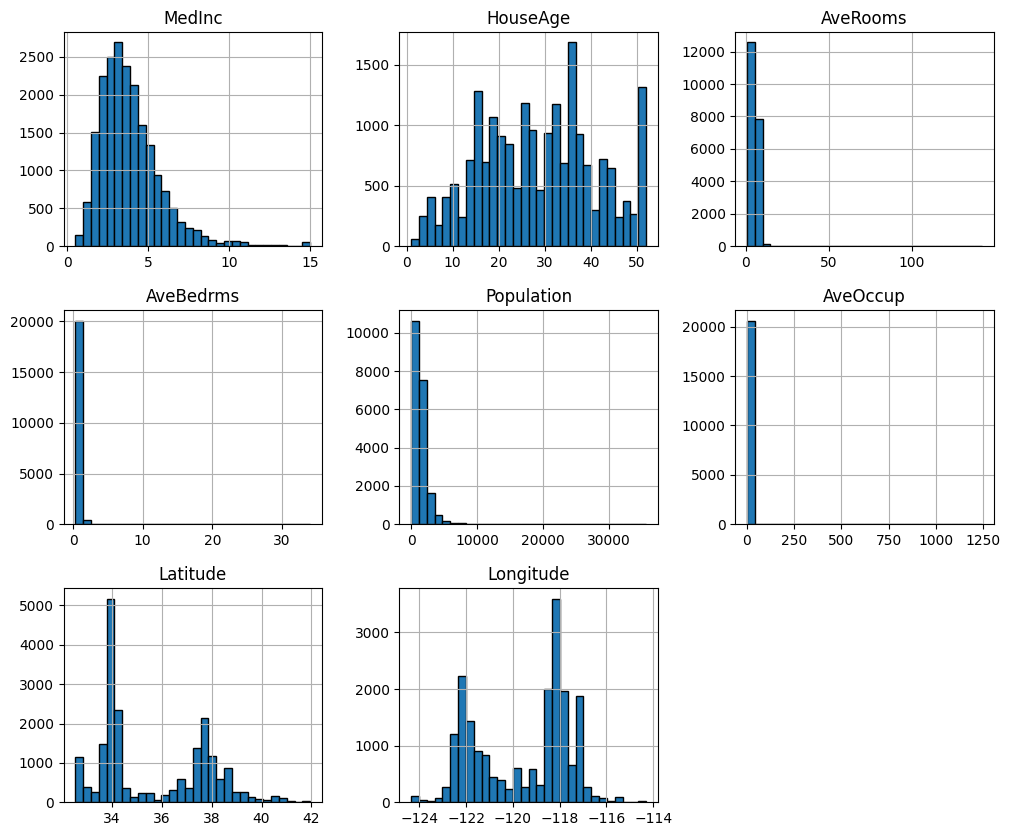

In [68]:
X.hist(figsize=(12, 10), bins=30, edgecolor="black")

<Axes: >

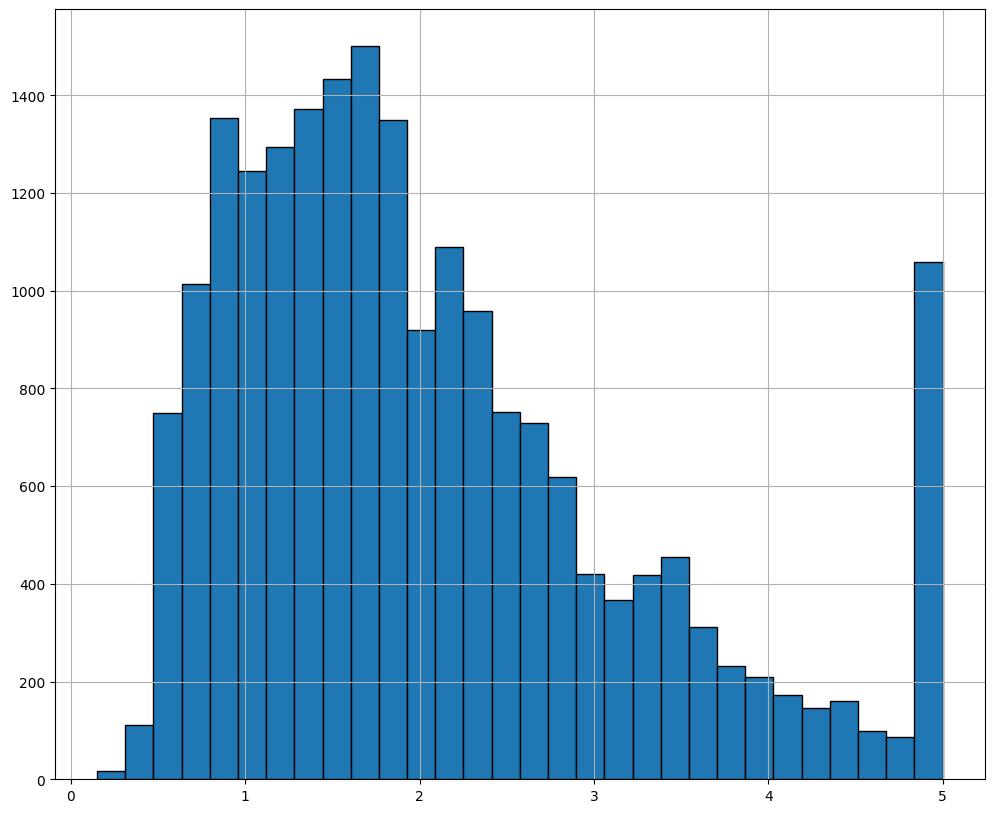

In [70]:
y.hist(figsize=(12, 10), bins=30, edgecolor="black")

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

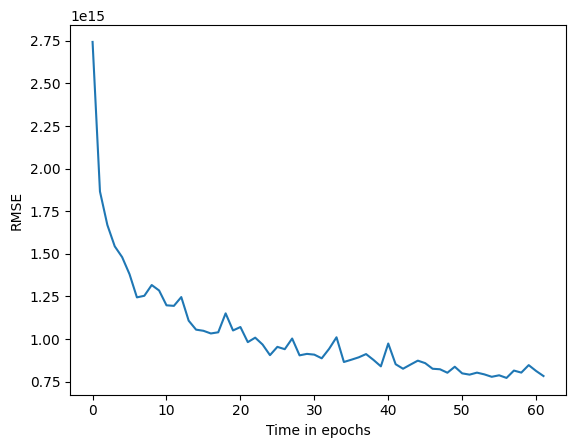

In [96]:
import sys
from io import StringIO

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
model = SGDRegressor(max_iter=1000, tol=1e-3, verbose=1)
model.fit(X_train, y_train)
sys.stdout = old_stdout

# Extract loss values from verbose output
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if "loss: " in line:
        loss_list.append(float(line.split("loss: ")[-1]))

plt.figure()
plt.plot(np.arange(len(loss_list)), np.sqrt(loss_list))  # RMSE is the square root of squared loss
plt.xlabel("Time in epochs")
plt.ylabel("RMSE")
plt.show()

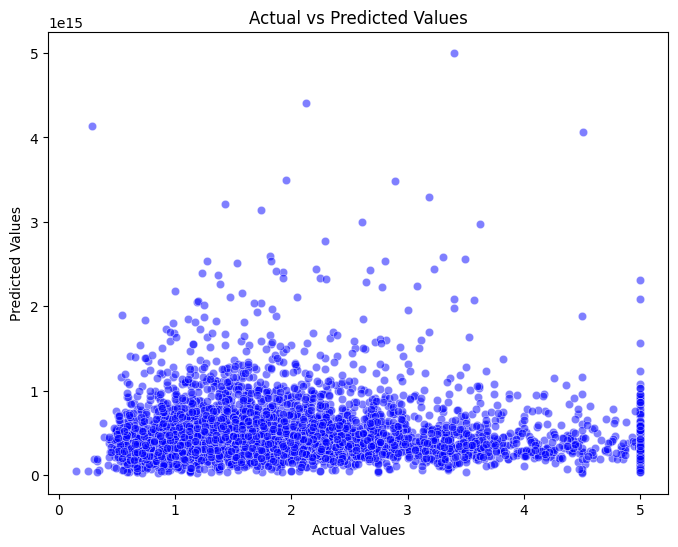

RMSE: 3.981680237516565e+29
model parameters:   w: [ 6.49440334e+11  2.20362594e+10  8.15222784e+10 -2.03680742e+11
  3.31085680e+11  4.26137464e+11  3.09790964e+11 -6.97236593e+10], b:[2.23139021e+09]


In [84]:
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

RMSE = mean_squared_error(y_test, y_pred)
print(f'RMSE: {RMSE}')
b_norm = model.intercept_
w_norm = model.coef_
print(f"model parameters:   w: {w_norm}, b:{b_norm}")